# Discussion 6 Supplementary Notebook – Data 100, Spring 2020

by Suraj Rampure (suraj.rampure@berkeley.edu)

<br>

This notebook was created to help illustrate some of the questions in Discussion 6 of Spring 2020. It will be posted [here](http://surajrampure.com/teaching/ds100.html), along with the slides that I created for this discussion.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

# Regression Notions

## Question 9

In [2]:
df = pd.DataFrame({
    'x': [2, 1, 9, 7, 8, 2, 3, 3, 5, 3],
    'y': [17, 18, 14, 4, 1, 15, 17, 3, 10, 6],
    'z': [38, 38, 46, 22, 18, 34, 40, 12, 30, 18]
})
df

x   y   z
0  2  17  38
1  1  18  38
2  9  14  46
3  7   4  22
4  8   1  18
5  2  15  34
6  3  17  40
7  3   3  12
8  5  10  30
9  3   6  18

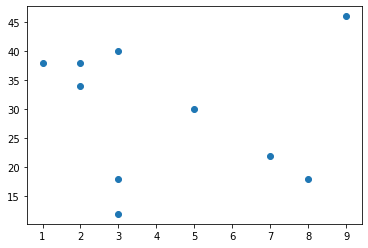

In [3]:
plt.scatter(df['x'], df['z'])

As we can see, the correlation between $x$ and $z$ is weak.

In [4]:
np.corrcoef(df['x'], df['z'])[1][0]

-0.0655225542370978

In [5]:
fig = px.scatter_3d(df, x = 'x', y = 'y', z = 'z')
fig.show()

Here, we see that as $x$ and $y$ increase, $z$ increases. You can think of our points as lying on the plane $z = 2x + 2y$.

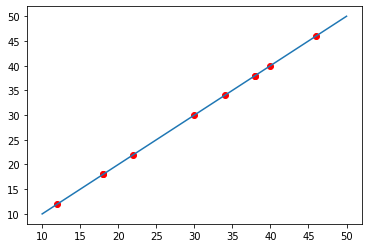

In [6]:
plt.scatter(2*df['x'] + 2*df['y'], df['z'], color = 'red')
plt.plot([10, 50], [10, 50]); # plotting y = x

When we scatter $z$ vs $2x + 2y$, we see that our points lie directly on the line $y = x$.

## Question 10

Note: The code used to generate the plots for this problem is random, and so you'll get different results each time you run it.

First, we re-create the leftmost plot, and experiment with what happens when we remove the dot.

In [7]:
x = np.random.normal(0, 1, 50)
y = x + np.random.normal(0, 0.5, 50)
outlier = (-3, 5)

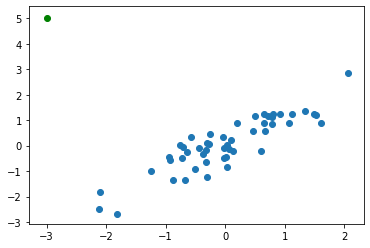

In [8]:
plt.scatter(x, y);
plt.scatter(outlier[0], outlier[1], color = 'g');

In [9]:
# correlation with outlier
np.corrcoef(np.append(x, outlier[0]), np.append(y, outlier[1]))[1][0]

0.43779233069123286

In [10]:
# correlation without outlier
np.corrcoef(x, y)[1][0]

0.8886938363724527

In [11]:
# ignore this magic – creates the line of best fit
def plot_best_fit(x, y):
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'r')

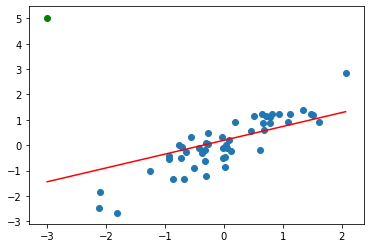

In [12]:
# line of best fit, with outlier
plot_best_fit(np.append(x, outlier[0]), np.append(y, outlier[1]));
plt.scatter(x, y);
plt.scatter(outlier[0], outlier[1], color = 'g');

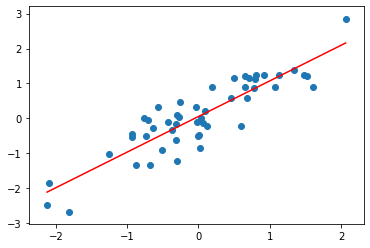

In [13]:
# line of best fit, without outlier
plot_best_fit(x, y);
plt.scatter(x, y);

As we can see, when we drop the outlier, our "line of best fit" becomes much more accurate, and the correlation between our `x` and `y` lists becomes significantly stronger.

Let's take a look at the second plot.

In [14]:
x = np.random.normal(0, 2, 50)
y = np.random.normal(0, 2, 50)
outlier = (8, 8)

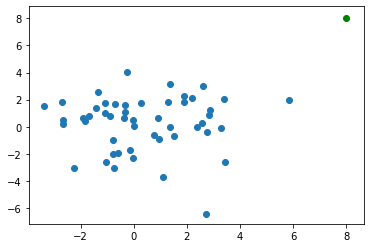

In [15]:
plt.scatter(x, y);
plt.scatter(outlier[0], outlier[1], color = 'g');

In [16]:
# correlation with outlier
np.corrcoef(np.append(x, outlier[0]), np.append(y, outlier[1]))[1][0]

0.2372070839437497

In [17]:
# correlation without outlier
np.corrcoef(x, y)[1][0]

0.011036820542233863

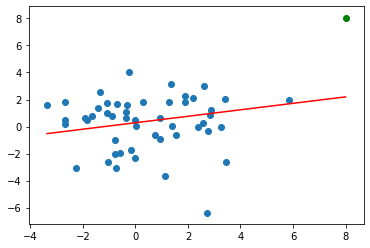

In [18]:
# line of best fit, with outlier
plot_best_fit(np.append(x, outlier[0]), np.append(y, outlier[1]));
plt.scatter(x, y);
plt.scatter(outlier[0], outlier[1], color = 'g');

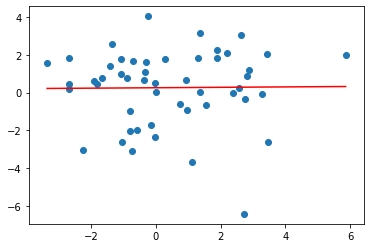

In [19]:
# line of best fit, without outlier
plot_best_fit(x, y);
plt.scatter(x, y);

In this case, the strength of our correlation drops when removing the outlier. The outlier tries to strengthen the "up and to the right" trend, which doesn't really exist without it. (Depending on when you run this, you may actually see a negative correlation in either case.)